In [2]:
!pip install librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.1/213.1 KB 195.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 KB 201.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.5/377.5 KB 136.7 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.4/323.4 KB 213.7 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23153 sha256=c02b8125b503cdbf3b8d28d6a0dd2d5013b9b3e3f540def5ba70cae3e6f209d1
  Stored in directory: /home/jovyan/.cache/pip/wheels/a2/a3/bd/ec1568ce7515115a11ab686d509ad302124c782af065de47ee
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320732 sha256=dbe56c90025139ed8b6872f1570338f7aa5e41c0b457524aabf62f1c5af355e3
  Stored in directory: /home/jovyan/.cache/pip/wheels/86/2c/7d/46a32a246b0e5939cea2c5ec1492164073e0c5d16d666ae2cd
Successfully built a

In [11]:
!pip install pydub

In [12]:
import requests
from bs4 import BeautifulSoup
import os
import errno
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

Get one of our wav files that has split the audio channels to left and right, and had the silences removed to practice with

In [44]:
vd_dir = '../voice_data/mono_channels/silence_removed/'     
test_fp = vd_dir + '4175_left_sil_rmvd.wav'
print(test_fp) 

../voice_data/mono_channels/silence_removed/4175_left_sil_rmvd.wav


In [45]:
test_audio = AudioSegment.from_file(test_fp)

We are only going to use a small clip of our file while investigating

In [46]:
# Create one minute of sample audio:
clip_start = 120000
clip_end = 180000

test_audio_clip = test_audio[clip_start:clip_end]

In [78]:
test_audio_clip.duration_seconds

60.0

In [47]:
test_audio_clip.export(out_f = 'test_audio_clip.wav', format='wav')

<_io.BufferedRandom name='test_audio_clip.wav'>

In [48]:
test_clip_fp = 'test_audio_clip.wav'

In [80]:
ipd.Audio(test_clip_fp)

In [81]:
# Get the audio and sample rate
test, test_sr = librosa.load(test_clip_fp)

In [51]:
FRAME_SIZE = 2048
HOP_SIZE = 512

# Next, the Short Time Fourier Transform
The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows.

In [52]:
s_test = librosa.stft(test, n_fft = FRAME_SIZE, hop_length = HOP_SIZE)

In [53]:
s_test.shape

(1025, 2584)

In [65]:
test.shape

(1323000,)

In [54]:
Y_test = np.abs(s_test) ** 2

In [55]:
def plot_spectromgram(Y, sr, hop_length, y_axis = 'linear'):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y,
                            sr = test_sr,
                            x_axis = 'time',
                            y_axis = y_axis)
    plt.colorbar(format="%+2.f")
    plt.savefig('test_spectrogram.png')

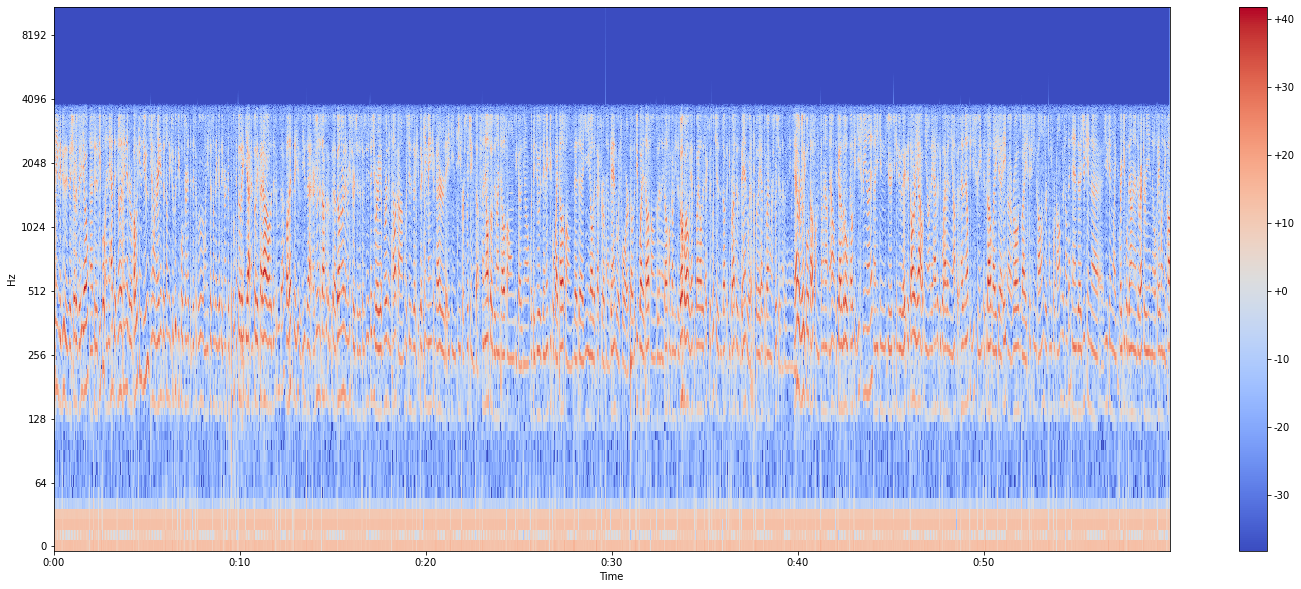

In [56]:
Y_log_scale = librosa.power_to_db(Y_test)

plot_spectromgram(Y_log_scale, test_sr, HOP_SIZE, y_axis = "log")

In [57]:
mfccs = librosa.feature.mfcc(y=Y_test)

In [58]:
mfccs.shape

(1025, 20, 6)

In [59]:
S = librosa.feature.melspectrogram(y=Y_test, sr=test_sr, n_mels=128,
                                   fmax=8000)
librosa.feature.mfcc(S=librosa.power_to_db(S))

array([[[ 3.63113617e+02,  3.85477295e+02,  3.84121674e+02,
          3.84371399e+02,  3.73879761e+02,  3.52918427e+02],
        [ 4.23980293e+01,  2.69958305e+01,  1.97816277e+01,
          1.69027405e+01,  2.48449631e+01,  4.02679291e+01],
        [ 9.88258553e+00, -2.70473814e+00, -1.25670547e+01,
         -1.36487074e+01, -2.57037854e+00,  6.51971054e+00],
        ...,
        [ 6.84504271e+00,  8.27143860e+00,  6.65284538e+00,
          5.15462589e+00,  2.82477999e+00, -6.07273042e-01],
        [ 4.60825920e+00,  5.25470161e+00,  2.96546078e+00,
          5.06942892e+00,  5.19907808e+00,  6.00989461e-02],
        [ 2.76753330e+00,  4.19832897e+00,  1.62274361e+00,
          1.08010054e+00,  3.94406581e+00,  6.63162184e+00]],

       [[ 2.68068787e+02,  2.85510773e+02,  2.82767151e+02,
          2.86202850e+02,  2.78271057e+02,  2.54818085e+02],
        [ 2.43079185e+01,  5.47483540e+00, -4.27193928e+00,
         -3.22810745e+00,  6.19005394e+00,  2.32793961e+01],
        [ 2.69726

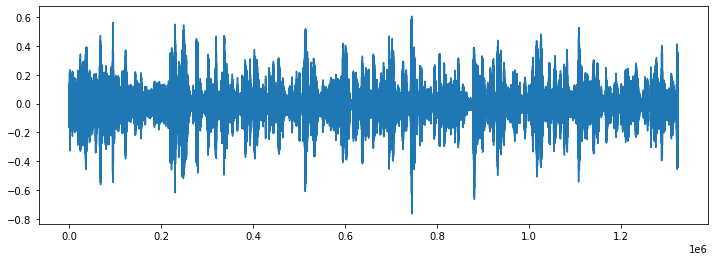

In [67]:
# Librosa: mono track
plt.figure(figsize=(12,4))
plt.plot(test)
plt.savefig('librosa_audio.png')

In [71]:
mfccs = librosa.feature.mfcc(y=test, sr=test_sr, n_mfcc=40)

In [72]:
mfccs.shape

(40, 2584)

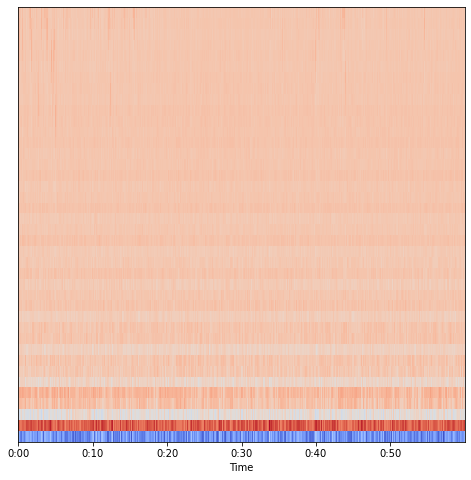

In [75]:
plt.figure(figsize=(8,8))
librosa.display.specshow(mfccs, sr=test_sr, x_axis='time')
plt.savefig('MFCCs.png')


ValueError: too many values to unpack (expected 2)

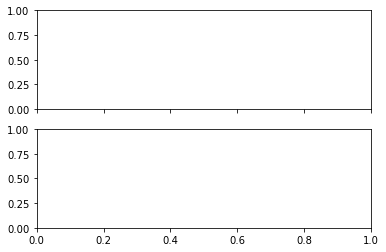

In [73]:
# From Librosa tutorial: https://librosa.org/doc/main/generated/librosa.feature.mfcc.html
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
                               #x_axis='time', y_axis='mel', fmax=8000,
                              # ax=ax[0])

In [ ]:
librosa.power_to_db(

In [ ]:
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')